# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [12, 300, 439]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,31714,12319,11757,287,3881,2931
1,16448,6243,6360,824,2662,2005
2,2787,1698,2510,65,477,52


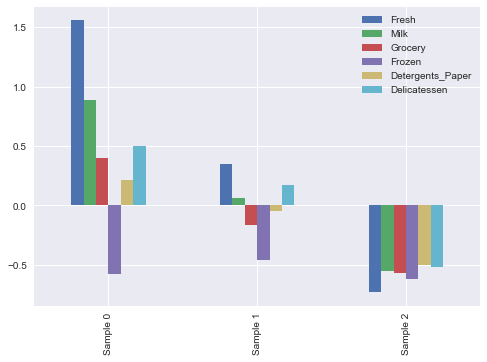

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Standardization of Samples features
samples_for_plot = samples.copy()
samples_for_plot = (samples_for_plot - data.mean())/data.std()

# Visualization of Samples features after standardization
labels = ["Sample {}".format(i) for i in samples.index]
samples_for_plot.plot(kind='bar')
_ = plt.xticks(range(3),labels)

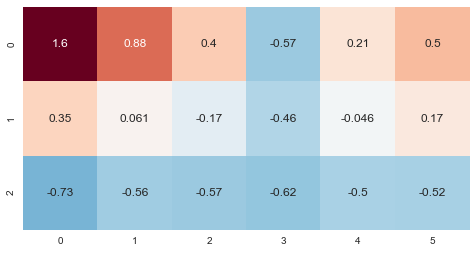

In [5]:
from sklearn.preprocessing import StandardScaler

ssc = StandardScaler()
ssc.fit(data)
sns.heatmap(ssc.transform(samples), annot=True, cbar=False, square=True)

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

Now that our samples data is standardized we can compare it in a meaningful way; thus Sample 0 has a spending on five features with a standard deviation above the mean: +1.6 std for Fresh, +0.88 std for Milk, +0.4 std for Grocery, +0.21 std for Detergents_Paper, and one feature with a standard deviation below the mean which is Frozen with -0.57 std. Therefore, this establishment must be a Wholesale Retailer since it spends mostly above the mean on five features.

Sample 1 could be a Hotel or a Delis Shop because it spends on three categories above the mean: +0.35 std on Fresh, +0.061 std on Milk, and +0.17 std on Delicatessen. On the other hand, this establishment expenses is below the mean for Grocery, Frozen, and Detergents_Paper with -0.17 std, -0.46 std, and -0.046 std respectively.

Sample 2 should be a Coffee Shop because its expenditures on all categories is below the mean: -0.73 std for Fresh, -0.56 std for Milk, -0.57 std for Grocery, -0.62 std for Frozen, -0.5 std for Detergents_Paper, and finally -0.52 std for Delicatessen.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

def calculate_r_2_for_feature(data,feature):
    new_data = data.drop(feature, axis=1)

    X_train, \
    X_test,  \
    y_train, \
    y_test = train_test_split(
        new_data,data[feature],test_size=0.25
    )

    regressor = DecisionTreeRegressor()
    regressor.fit(X_train,y_train)

    score = regressor.score(X_test,y_test)
    return score

def r_2_mean(data,feature,runs=100):
    return np.array([calculate_r_2_for_feature(data,feature)
                     for _ in range(100) ]).mean().round(4)

print("{0:17} {1}".format("Fresh: ", r_2_mean(data,'Fresh'))) 
print("{0:17} {1}".format("Milk: ", r_2_mean(data,'Milk')))
print("{0:17} {1}".format("Grocery: ", r_2_mean(data,'Grocery')))
print("{0:17} {1}".format("Frozen: ", r_2_mean(data,'Frozen')))
print("{0:17} {1}".format("Detergents_Paper: ", r_2_mean(data,'Detergents_Paper')))
print("{0:17} {1}".format("Delicatessen: ", r_2_mean(data,'Delicatessen')))

Fresh:            -0.7148
Milk:             0.1227
Grocery:          0.6831
Frozen:           -1.0425
Detergents_Paper:  0.6656
Delicatessen:     -2.7519


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**  

Since we don’t have a lot of features (just 6) and the data is not too large, we could try to predict all the features so that we can have a general idea on the relationships among features. After 100 random generated trials predicting all the features, the average $R^2$ score for each feature is :

|Feature              | $R^2$ Score  |
|---------------------|------------|
|Fresh:               | -0.6982    |
|Milk:                |0.1223      |
|Grocery:             | 0.6654     |
|Frozen:              |-1.3267     |
|Detergents_Paper:    |0.6765      |
|Delicatessen:        |-2.4565     |

We can say that the features necessary for identifying customers’ spending habits are Fresh, Frozen, and Delicatessen because these features have a negative $R^2$; therefore, they cannot be estimated by a linear combination of all other features.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

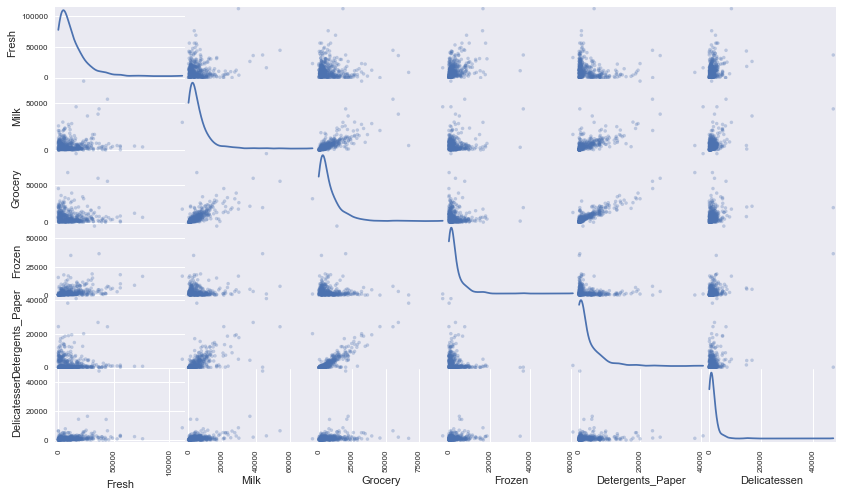

In [7]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

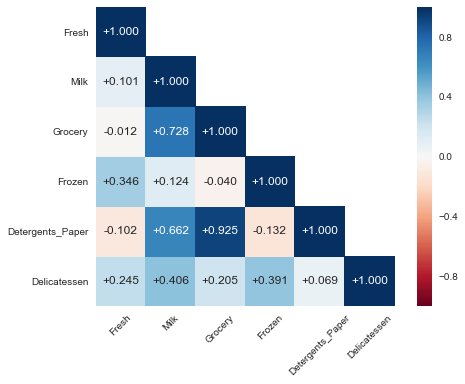

In [8]:
# Plotting the correlation of the data using a Heatmap

corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True,
                     cmap='RdBu', fmt='+.3f')
    plt.xticks(rotation=45, ha='center')

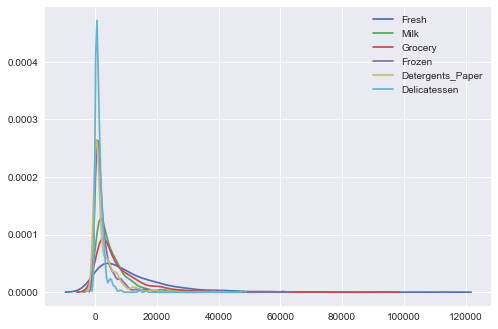

In [9]:
# Plotting the distribution of the data

for col in ["Fresh", "Milk","Grocery", "Frozen", "Detergents_Paper","Delicatessen"]:
    sns.kdeplot(data[col])

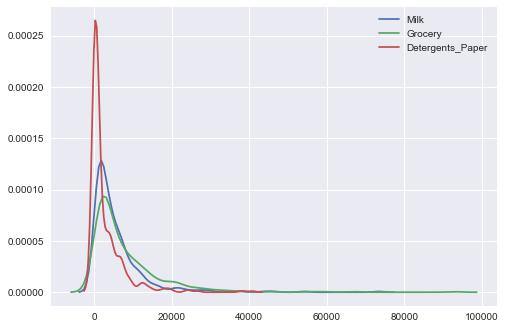

In [10]:
for col in ["Milk","Grocery", "Detergents_Paper"]:
    sns.kdeplot(data[col])

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**  The features in most of our dataset are not normally distributed instead they have a right skewed distribution as we can see on the plot up here. Therefore, we can infer that our dataset has outliers in each feature because these outliers are significantly above the expected range and thus, they drag the distribution to the right. However, “Fresh” tends to be normally distributed. 

We have 3 pairs that have a correlation above 0.5: “Grocery and Detergents_Paper” have the highest correlation of 0.92, follow by “Grocery and Milk” with 0.72, and finally “Milk and Detergents_Paper” which has a correcation of 0.66. This confirm what we said up here that the most important feature of the data is Fresh, Frozen, and Dellicatessen because of the correlation of each of them with the rest of features. These features have a right skewed distribution.

https://www.quora.com/How-do-outliers-affect-normal-distribution-in-statistics

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

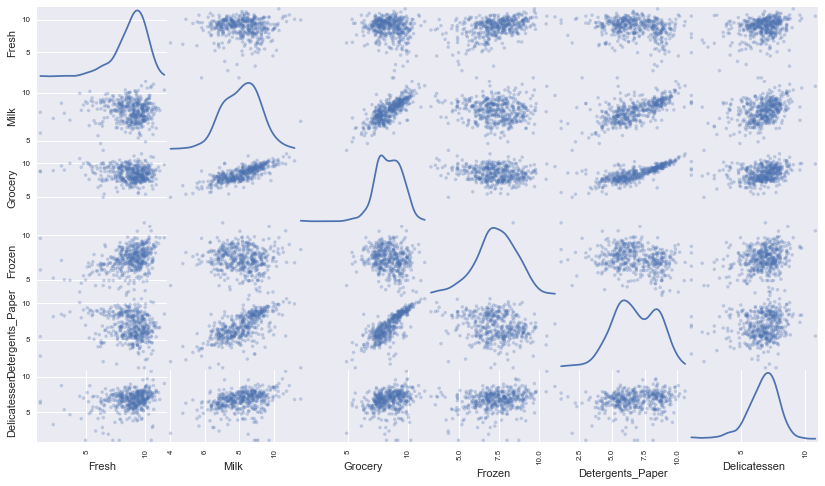

In [11]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

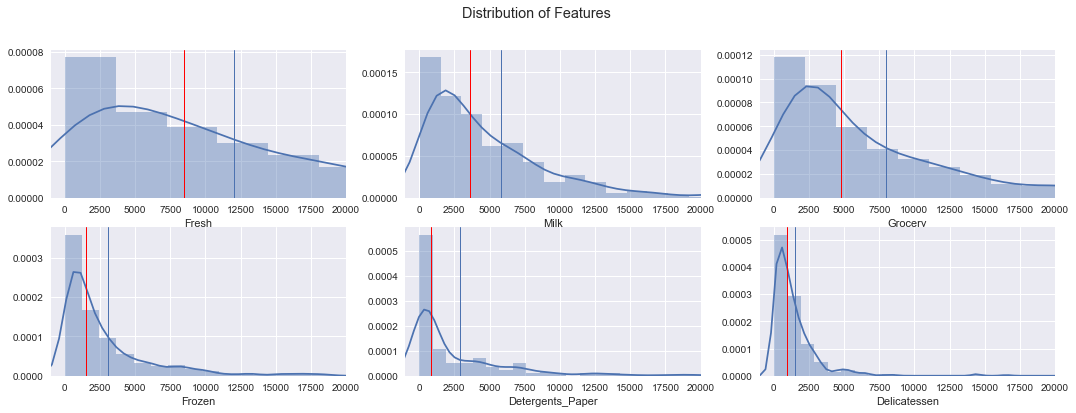

In [12]:
# Distribution of data before scaling.

fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features')

for i, col in enumerate(data.columns):
    feature = data[col]
    sns.distplot(feature, label=col, ax=axes[i]).set(xlim=(-1000, 20000),)
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

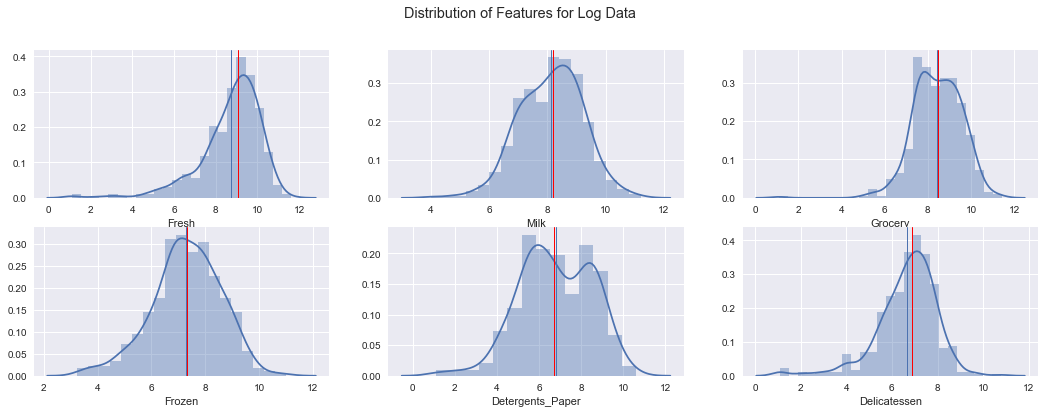

In [13]:
# the distribution of data after scaling.

fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_size_inches(18, 6)
fig.suptitle('Distribution of Features for Log Data')

for i, col in enumerate(log_data.columns):
    feature = log_data[col]
    sns.distplot(feature, label=col, ax=axes[i])
    axes[i].axvline(feature.mean(),linewidth=1)
    axes[i].axvline(feature.median(),linewidth=1, color='r')

In [14]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,10.364514,9.418898,9.372204,5.659482,8.263848,7.983099
1,9.707959,8.739216,8.757784,6.714171,7.886833,7.603399
2,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [15]:
# For each feature find the data points with extreme high or low values
value= []
dup = []

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    newDf = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    
    for val in newDf.index.tolist():
        if val not in value:
            value.append(val)
        else:
            if val not in dup:
                dup.append(val)
        
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [] + dup 

print("\nWe have {} outliers in the dataset\n".format(len(value)))
print("down here is the list of all outliers:\n")
print(sorted(value))
print("\nHere is the list of outliers to be deleted from the data:\n")
print(sorted(outliers))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372



We have 42 outliers in the dataset

down here is the list of all outliers:

[38, 57, 65, 66, 75, 81, 86, 95, 96, 98, 109, 128, 137, 142, 145, 154, 161, 171, 175, 183, 184, 187, 193, 203, 218, 233, 264, 285, 289, 304, 305, 325, 338, 343, 353, 355, 356, 357, 412, 420, 429, 439]

Here is the list of outliers to be deleted from the data:

[65, 66, 75, 128, 154]


### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**  Our old dataset had __42 outliers__ because these points were outside of the fences `(Q1-IQR and Q3+IQR)`. Among these 42 points, five were considered outliers for more than one feature `[65, 66, 75, 128, 154]` most of them by two features except `[154]` that was considered outlier by 3 features. I think that only these five points should be removed from the dataset because as they affect more than one feature. I didn’t remove all the 42 outliers from the data because doing so would mean that we are removing almost 10% of our data and this a big amount; thus, we could lose some information here. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

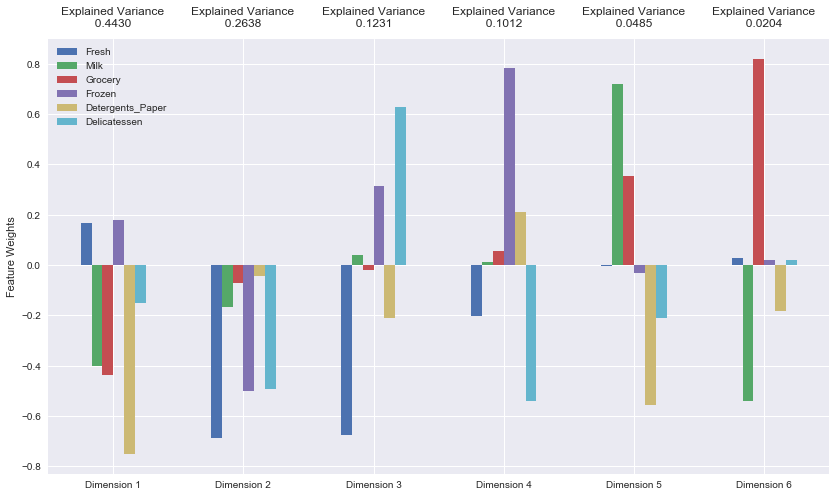

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=good_data.shape[1]).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [17]:
variances = np.array(pca.explained_variance_ratio_)
var_2 = np.sum(variances[:2])
var_4 = np.sum(variances[:5])
print("{:.2f} % of variance is explained by the 1st and 2nd principal component".format(var_2*100))
print("{:.2f} % of variance is explained by the first four principal component".format(var_4*100))

70.68 % of variance is explained by the 1st and 2nd principal component
97.96 % of variance is explained by the first four principal component


### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**   The first two principal components explain 70.68% of variance in the data and 97.96% of variance is explained by the first four principal components.

Dimension 1: When we compare the absolute variance of all the features, we can see that Detergents_Paper has the strongest variance follow by Grocery and Milk among the most important feature of this component. The least important are Fresh, Frozen, and Delicatessen. In this dimension, we have customers that spends more on Detergents_Paper than any other product, follow by Grocery and Milk. I think this dimension represents establishment like Wholesale Retailers; and we could also have some Coffee Shops here too because of the Milk consumption.
44.30% of variance in the data is explained by this dimension.

Dimension 2 explains 26,38% of variance and the most important feature here is Fresh that captures most of the variance follow by Frozen and Delicatessen. Milk, Grocery, and Detergents_Paper are least import features in this dimension. In other words, this dimension captures customers that spend a lot on Fresh, Frozen and Delicatessen; these customers could be Restaurants. 

We have two leading candidates in dimension 3 that captures most the 12,31% of variance of this dimension: Fresh and Delicatessen, both are follow by Frozen products. I think this dimension represents establishments like Delis Stores or even some fast-food restaurants.

In dimension 4, only two features are the most important which are Frozen and Delicatessen; the others are least important. This dimension explains 10,12% of variance. I think this dimension represents hotels and restaurants.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [18]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-2.2406,-1.2419,-1.0729,-1.9589,0.2160,-0.1782
1,-1.2804,-0.9587,-0.4701,-0.9124,-0.2345,-0.2514
2,0.7390,3.6914,-2.0335,-0.9927,0.3109,-0.1734


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [19]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [20]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-2.2406,-1.2419
1,-1.2804,-0.9587
2,0.7390,3.6914


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

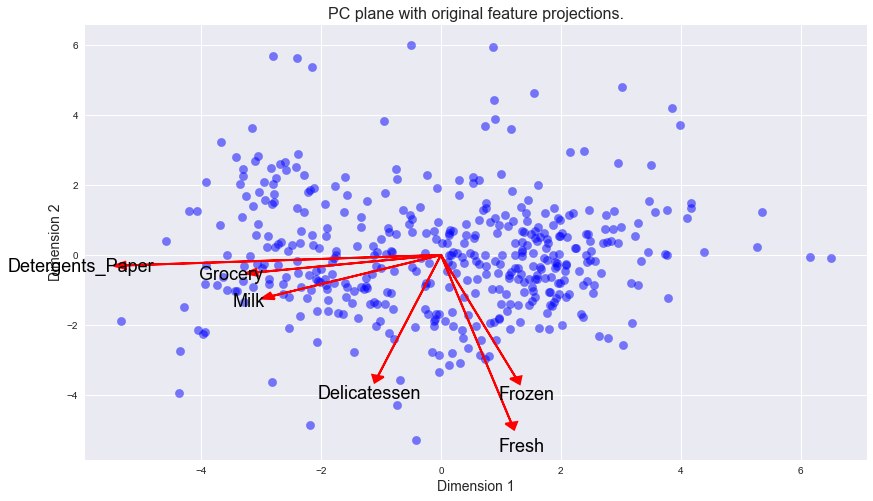

In [21]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**  K-means is great for speed and it is easy to implement in sklearn. The “K” here is the number of clusters that will be formed from the data. K-means is great for data that are grouped together in circle or in a spherical way or hyper-spherical in higher dimensions.

GMM is a powerful algorithm that gives us a soft-clustering meaning that it allows sample membership of multiple clusters. For example, a data point belongs to each cluster to a different degree. This is not possible in K-means because here a point belongs to only and only one cluster. GMM generates shapes that are flexible; thus, not limited to spherical shapes like k-means.

Given our data, I will use a GMM because after processing our data is kind of normally distributed. Second, this is a soft clustering algorithm; thus, we will be able the fine tune the covariance so we could have a better result.

https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm 

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [22]:
from sklearn import mixture
from sklearn.metrics import silhouette_score

n_clusters = [2, 4, 6, 8]
scores = []
for clusters in n_clusters:
    gmm = mixture.GaussianMixture(n_components= clusters, random_state=12)
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = gmm.fit(reduced_data)
    
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    
    # TODO: Find the cluster centers
    centers = clusterer.means_
    
    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    scores.append(silhouette_score(reduced_data, preds))

In [23]:
for clusters, score in zip(n_clusters, scores):
    print("The silhouette score of {} clusters is {:.3f}".format(clusters, score))

The silhouette score of 2 clusters is 0.422
The silhouette score of 4 clusters is 0.316
The silhouette score of 6 clusters is 0.298
The silhouette score of 8 clusters is 0.291


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

|n_clusters | silhouette score|
|-----------|-----------------|
|2          |0.422            |
|4          |0.316            |
|6          |0.298            |
|8          |0.291            |

The best silhouette score is 0.422 and it's when we have 2 clusters

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

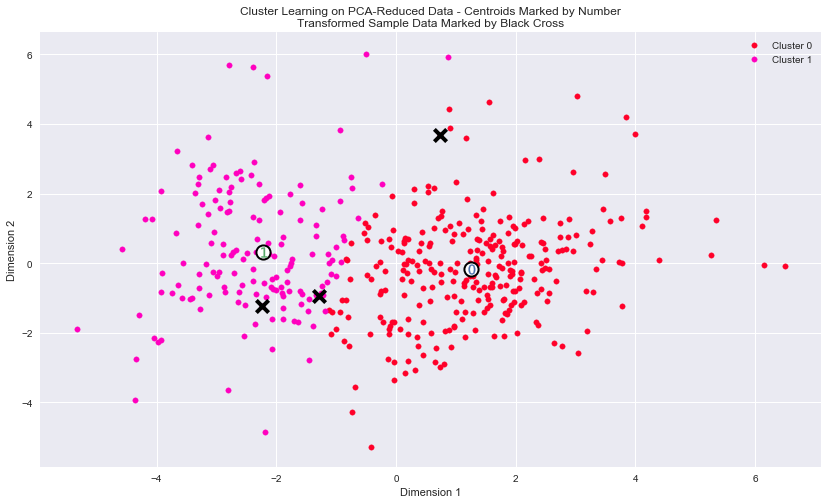

In [24]:
gmm = mixture.GaussianMixture(n_components= 2, random_state=12)
clusterer = gmm.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data, preds)

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [25]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)
display(np.exp(good_data.mean()))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8939.0,2108.0,2758.0,2073.0,352.0,730.0
Segment 1,3567.0,7860.0,12249.0,873.0,4713.0,966.0


Fresh               6416.773102
Milk                3389.289925
Grocery             4723.172916
Frozen              1517.168845
Detergents_Paper     896.957185
Delicatessen         807.827639
dtype: float64

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

Comparing the mean of `good_data` and our segments here, we can say that in Segment 0 we have customers that buy a lot of “Fresh” products (way above the mean, close to Q3) and they spend also on “Frozen” in the second position, follow by Grocery, Milk, Delicatessen, and finally by Detergents & Paper. We could have in this segment Hotels and Coffee Shops.

Segment 1 is where we have customers that buy a lot from distributor. As we can see the means of four products here is way above or slightly above the mean of our data sample (good_data). These customers spend a lot of money on Grocery, follow by Milk, Detergents & Paper, Delicateseen, Fresh, and Frozen. We could have here Wholesale Retailers, Minimarts, Restaurants as customers.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [26]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**

The algorithm predicts that sample point 0 and 1 are members of Segment 1 and this aligns with our assumptions on Question 1 about the kind of establishment these points were. However, I did put Hotel in Segment 0 and I did also assume that sample point 1 could be a Deli shop or a Hotel; I think this is possible since we are using a Gaussian Mixture Model Clustering and we know it’s a soft-clustering algorithm.

The algorithm puts the sample point 2 into Segment 0 which is correct according to our assumption on Question 1 because we said that this could be a Coffee Shop.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

It’s always a good idea to run a A/B test when we want to change the way things are done for a product or service. The wholesale distributor can proceeds as follow for its delivery service problem:
1.	Since the idea is to change the delivery service from 5 days a week to 3 days a week, some hypotheses must be drawn beforehand:  H0 – The new delivery system will not have an impact on Segment 0 nor on Segment 1. H1 – The new delivery system will have a positive impact on Segment 0 or Segment 1.
2.	Now we need some tracking metrics that will help us to do the comparison at the end of the test. Here we can track the total amount of expenditure of each customer on each product. This way we will be able, after averaging the result, to see if the new delivery system had an impact or not, and if it does, what product was the most purchased.
3.	This is where a sample must be drawn from each segment. We need two subgroups for each segment. The first subgroup will be the “control group” which will receive the same service as the other customers not involve in the test. The second subgroup will be the “test group” which will experience the new delivery system of 3 days a week.
4.	Then we’ll need a timeline to gather enough data for the analysis. Once the analysis done, based on the result, the wholesale distributor will either reject H0 and go with H1. In other words, if the result show that the new delivery service of 3 days a week has a positive impact on a segment, now this service can roll over all other customers.

The way our segments are designed we could guess that the new delivery service of 3 days a week would probably have a positive impact on customers of Segment 1 because they purchase a lot of dairy like milk which expires after a certain time. Since we have restaurants and wholesale retailers in this segment, they need a high turnover inventory meaning they need to sell and replace items or products in a short period.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
Since the data has a new engineered feature, customer segment, the wholesale distributor can use a Decision Tree Classifier to classifier the new customers and the target variable will be customer segment. First, we create a new column `customer_segment` in the `good_data`; then we train the classifier with [X =  the first 6 features of `good_data`] and [y = the last or new column of `good_data`] which is the target variable. After fitting the data to the classifier, we can now predict the segment of each of the new customers.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

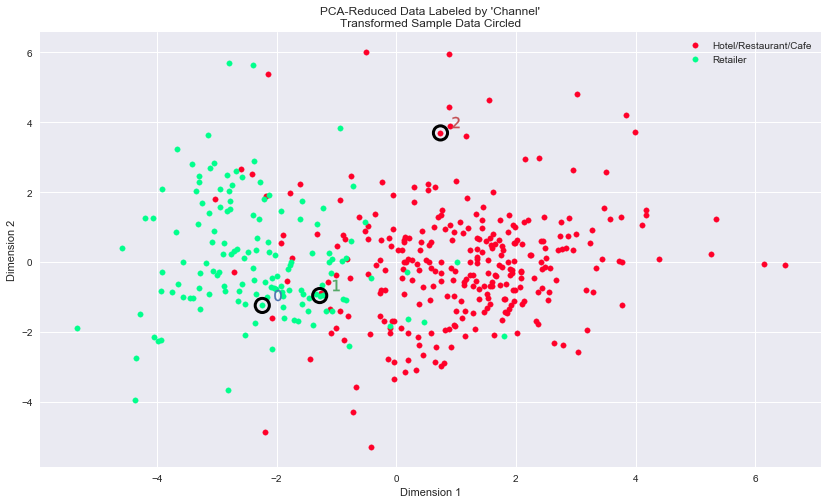

In [27]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

We can say that the clustering algorithm did a great job on the dataset and we did choose two clusters based on the silhouette score. We can see that the original data had two groups or clusters as well. The difference is that we did put `Restaurants` in a different cluster after segmentation of the algorithm. 

Looking at this distribution there might be customer segments that would be classified as purely _“Retailers”_ or _“Hotels/Restaurants/Cafes”_; especially for the last one, we can see that the points in the top right corner are pure _“Hotels/ Restaurants/Cafes”_ while most of the points on the left site could be pure _“Retailers”_.

These classifications are quite consistent with my previous definition of the customer segments because in my definition, I did put Restaurants in another cluster but in general the original data had two labels in the `Chanel` feature and our algorithm divided the data into two segments. However, the segmentation of the `Chanel` feature tends to be mixed.